# Hive

In [21]:
import findspark
findspark.init()

import sys
import subprocess
import logging
from pyspark.sql import SparkSession
from pyspark.sql.functions import col,lit
from pyspark.sql.types import StructType
formatter = logging.Formatter('[%(asctime)s] %(levelname)s @ line %(lineno)d: %(message)s')
handler = logging.StreamHandler(sys.stdout)
handler.setLevel(logging.INFO)
handler.setFormatter(formatter)
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.addHandler(handler)

from pyspark.sql import Row
from pyspark.sql import HiveContext
import pyspark
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

from pyspark.sql import Row
from pyspark.sql import HiveContext
import pyspark
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns
from matplotlib.dates import DateFormatter

In [2]:
appName= "hive_pyspark"
master= "local"

In [3]:
spark = SparkSession.builder.master(master).appName(appName).enableHiveSupport().getOrCreate()

23/01/08 13:40:09 WARN util.Utils: Your hostname, node1 resolves to a loopback address: 127.0.0.1; using 10.0.2.15 instead (on interface enp0s3)
23/01/08 13:40:09 WARN util.Utils: Set SPARK_LOCAL_IP if you need to bind to another address
23/01/08 13:40:10 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


# Crypto currency comparison in different currencies

In [4]:
crypto = spark.sql("select * from crypto_data LIMIT 18")

In [5]:
crypto.show()

+---------+--------+-------------------+
|   symbol|   price|               time|
+---------+--------+-------------------+
|  BTCUSDT|16732.64|2023-01-02-09-37-44|
|  ETHUSDT|  1219.2|2023-01-02-09-37-44|
|  ADAUSDT|  0.2552|2023-01-02-09-37-44|
|  XRPUSDT|  0.3441|2023-01-02-09-37-44|
|MATICUSDT|  0.7803|2023-01-02-09-37-44|
| DOGEUSDT| 0.07222|2023-01-02-09-37-44|
|   BTCEUR|15563.35|2023-01-02-09-37-44|
|   ETHEUR|  1134.0|2023-01-02-09-37-44|
|   XRPEUR|    0.32|2023-01-02-09-37-44|
|   BTCGBP|13881.06|2023-01-02-09-37-44|
|   ETHGBP| 1011.31|2023-01-02-09-37-44|
|   XRPGBP|  0.2856|2023-01-02-09-37-44|
|  DOTUSDT|    4.52|2023-01-02-09-37-44|
|   DOTEUR|     4.2|2023-01-02-09-37-44|
|   ADAEUR|  0.2373|2023-01-02-09-37-44|
|  DOGEEUR| 0.06714|2023-01-02-09-37-44|
|  DOGEGBP| 0.05992|2023-01-02-09-37-44|
|   DOTGBP|    3.75|2023-01-02-09-37-44|
+---------+--------+-------------------+



In [6]:
crypto = spark.sql("select * from crypto_data LIMIT 18")
crypto.show()

+---------+--------+-------------------+
|   symbol|   price|               time|
+---------+--------+-------------------+
|  BTCUSDT|16732.64|2023-01-02-09-37-44|
|  ETHUSDT|  1219.2|2023-01-02-09-37-44|
|  ADAUSDT|  0.2552|2023-01-02-09-37-44|
|  XRPUSDT|  0.3441|2023-01-02-09-37-44|
|MATICUSDT|  0.7803|2023-01-02-09-37-44|
| DOGEUSDT| 0.07222|2023-01-02-09-37-44|
|   BTCEUR|15563.35|2023-01-02-09-37-44|
|   ETHEUR|  1134.0|2023-01-02-09-37-44|
|   XRPEUR|    0.32|2023-01-02-09-37-44|
|   BTCGBP|13881.06|2023-01-02-09-37-44|
|   ETHGBP| 1011.31|2023-01-02-09-37-44|
|   XRPGBP|  0.2856|2023-01-02-09-37-44|
|  DOTUSDT|    4.52|2023-01-02-09-37-44|
|   DOTEUR|     4.2|2023-01-02-09-37-44|
|   ADAEUR|  0.2373|2023-01-02-09-37-44|
|  DOGEEUR| 0.06714|2023-01-02-09-37-44|
|  DOGEGBP| 0.05992|2023-01-02-09-37-44|
|   DOTGBP|    3.75|2023-01-02-09-37-44|
+---------+--------+-------------------+



In [32]:
spark.sql(str("SELECT * FROM crypto_data WHERE symbol == '" + 'BTC' + "USDT' AND rlike(time, '2023-01-04-*')")).show()

+-------+--------+-------------------+
| symbol|   price|               time|
+-------+--------+-------------------+
|BTCUSDT| 16732.8|2023-01-04-02-50-42|
|BTCUSDT|16730.28|2023-01-04-02-51-43|
|BTCUSDT|16729.72|2023-01-04-02-52-29|
|BTCUSDT| 16816.5|2023-01-04-03-19-52|
|BTCUSDT|16855.53|2023-01-04-04-14-30|
|BTCUSDT| 16850.7|2023-01-04-05-18-00|
|BTCUSDT| 16861.7|2023-01-04-06-22-11|
|BTCUSDT| 16863.2|2023-01-04-06-23-12|
|BTCUSDT|16861.96|2023-01-04-06-23-58|
|BTCUSDT|16851.08|2023-01-04-17-10-55|
|BTCUSDT| 16850.9|2023-01-04-17-11-10|
|BTCUSDT|16851.73|2023-01-04-17-11-41|
|BTCUSDT|16852.05|2023-01-04-17-12-12|
|BTCUSDT|16854.48|2023-01-04-17-12-27|
|BTCUSDT|16908.13|2023-01-04-18-18-27|
|BTCUSDT|16947.43|2023-01-04-18-40-45|
|BTCUSDT| 16942.7|2023-01-04-18-41-01|
|BTCUSDT|16940.29|2023-01-04-18-42-33|
|BTCUSDT|16948.22|2023-01-04-18-48-59|
|BTCUSDT| 16791.9|2023-01-04-20-45-51|
+-------+--------+-------------------+
only showing top 20 rows



In [43]:
def plot_crypto_comparison(currency):
    crypto = spark.sql(str("SELECT * FROM crypto_data WHERE symbol == '" + str(currency) + "USDT' AND NOT rlike(time, '2023-01-02-*')"))
    crypto_pd = crypto.toPandas()
    time = crypto_pd['time'].values.tolist()
    time = pd.to_datetime(time, format='%Y-%m-%d-%H-%M-%S')
    DF1 = pd.DataFrame()
    DF1['price'] = crypto_pd['price']
    DF1['time'] = time
    DF1 = DF1.sort_values('time').reset_index(drop = True)

    crypto = spark.sql(str("SELECT * FROM crypto_data WHERE symbol == '" + str(currency) + "GBP' AND NOT rlike(time, '2023-01-02-*')"))
    crypto_pd = crypto.toPandas()
    time = crypto_pd['time'].values.tolist()
    time = pd.to_datetime(time, format='%Y-%m-%d-%H-%M-%S')
    DF2 = pd.DataFrame()
    DF2['price'] = crypto_pd['price']
    DF2['time'] = time
    DF2 = DF2.sort_values('time').reset_index(drop = True)

    crypto = spark.sql(str("SELECT * FROM crypto_data WHERE symbol == '" + str(currency) + "EUR' AND NOT rlike(time, '2023-01-02-*')"))
    crypto_pd = crypto.toPandas()
    time = crypto_pd['time'].values.tolist()
    time = pd.to_datetime(time, format='%Y-%m-%d-%H-%M-%S')
    DF3 = pd.DataFrame()
    DF3['price'] = crypto_pd['price']
    DF3['time'] = time
    DF3 = DF3.sort_values('time').reset_index(drop = True)

    date_form = DateFormatter('%d-%m %H:%M')


    fig = plt.figure(figsize = (10, 15))
    ax1 = plt.subplot2grid((8, 1), (0, 0), rowspan=2, colspan=1)
    ax1.tick_params(axis='x', rotation=45)
    ax1.xaxis.set_major_formatter(date_form)

    ax2 = plt.subplot2grid((8, 1), (3, 0), rowspan=2, colspan=1)
    ax2.tick_params(axis='x', rotation=45)
    ax2.xaxis.set_major_formatter(date_form)

    ax3 = plt.subplot2grid((8, 1), (6, 0), rowspan=2, colspan=1)
    ax3.tick_params(axis='x', rotation=45)
    ax3.xaxis.set_major_formatter(date_form)


    p1 = sns.lineplot(data = DF1, x = 'time', y = 'price', ax = ax1)
    p1.set_title(str(currency) + ' price in USD for 2023')
    p1.set_xlabel('Date')
    p1.set_ylabel('Price per unit (USD)')


    p2 = sns.lineplot(data = DF2, x = 'time', y = 'price', ax = ax2)
    p2.set_title(str(currency) +' price in GBP for 2023')
    p2.set_xlabel('Date')
    p2.set_ylabel('Price per unit (GBP)')

    p3 = sns.lineplot(data = DF3, x = 'time', y = 'price', ax = ax3)
    p3.set_title(str(currency) +' price in EUR for 2023')
    p3.set_xlabel('Date')
    p3.set_ylabel('Price per unit (EUR)')

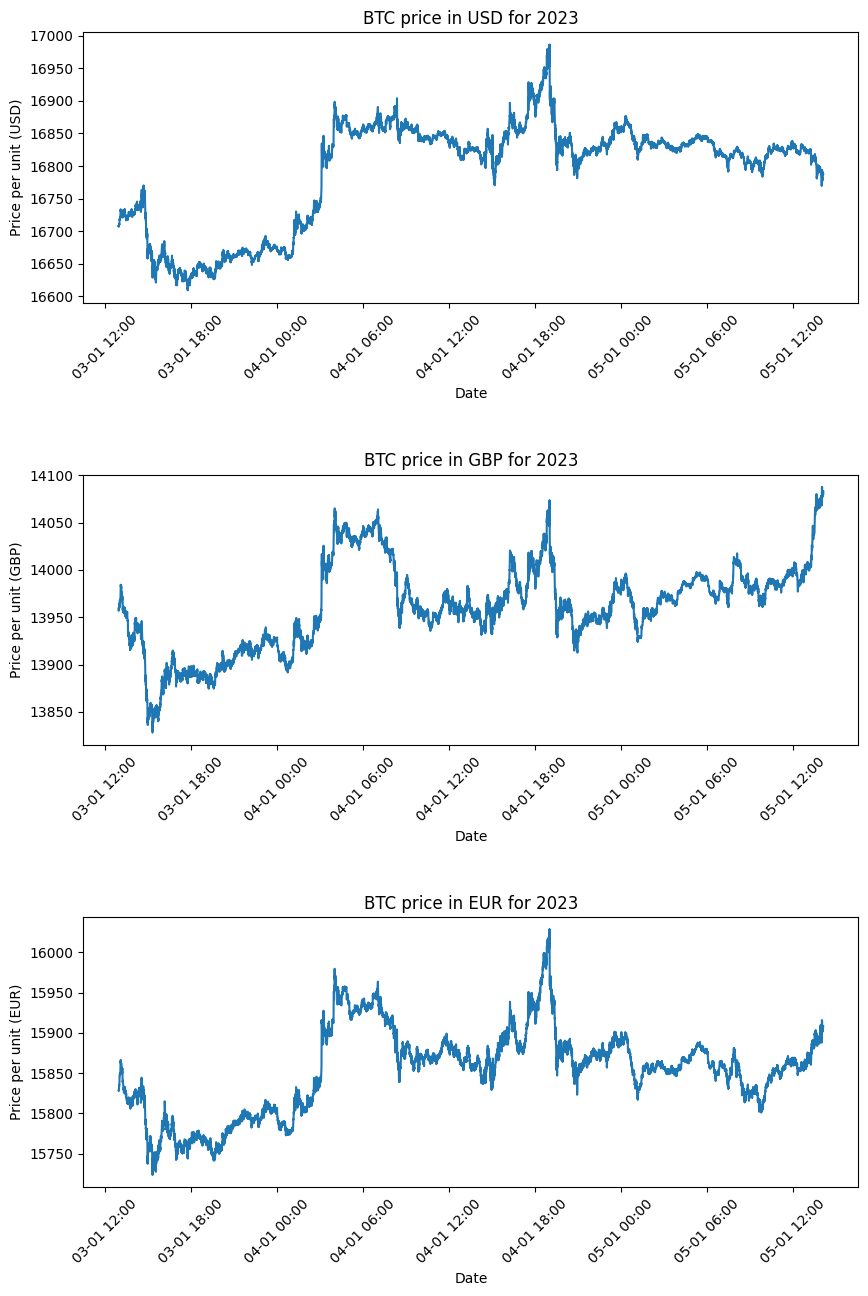

In [44]:
plot_crypto_comparison('BTC')

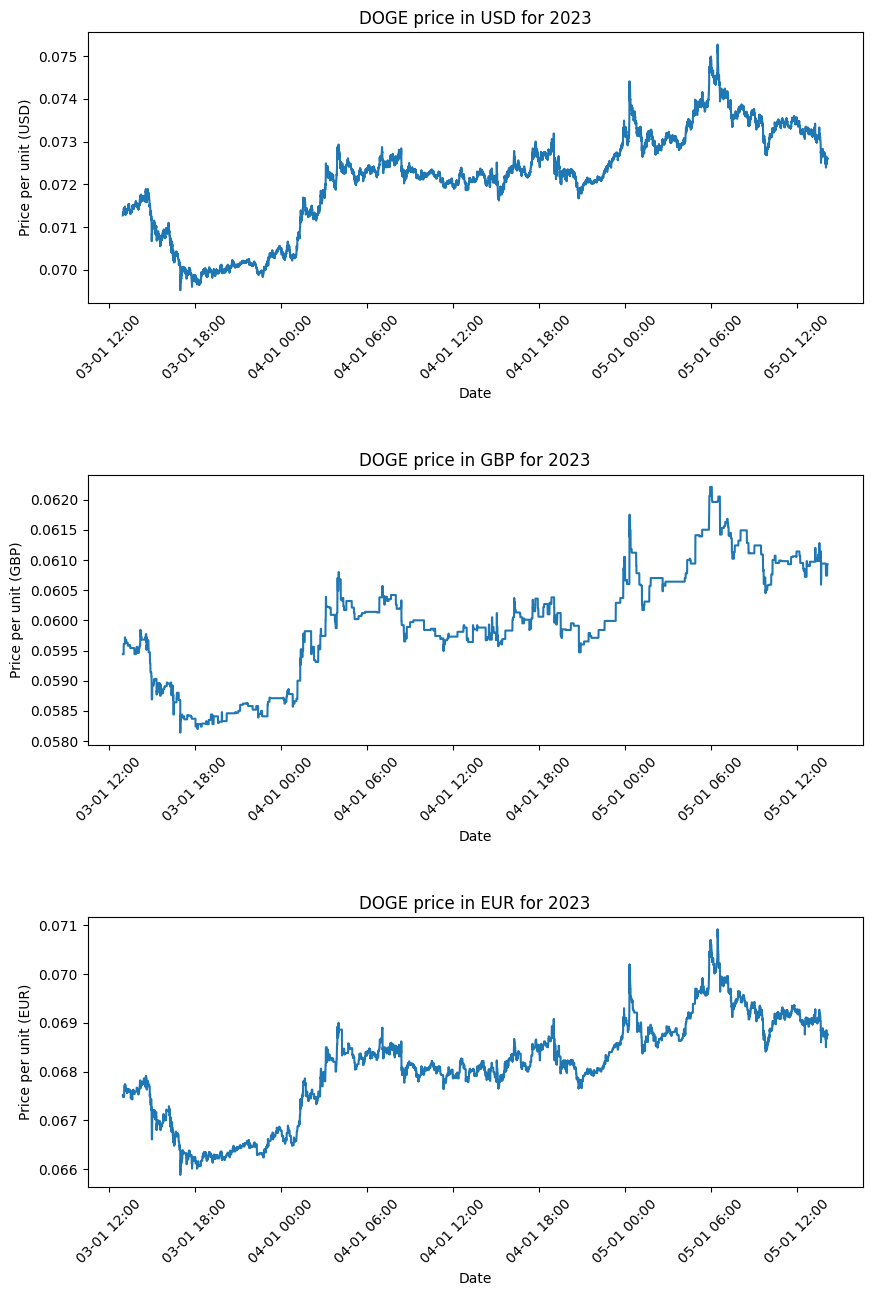

In [45]:
plot_crypto_comparison('DOGE')

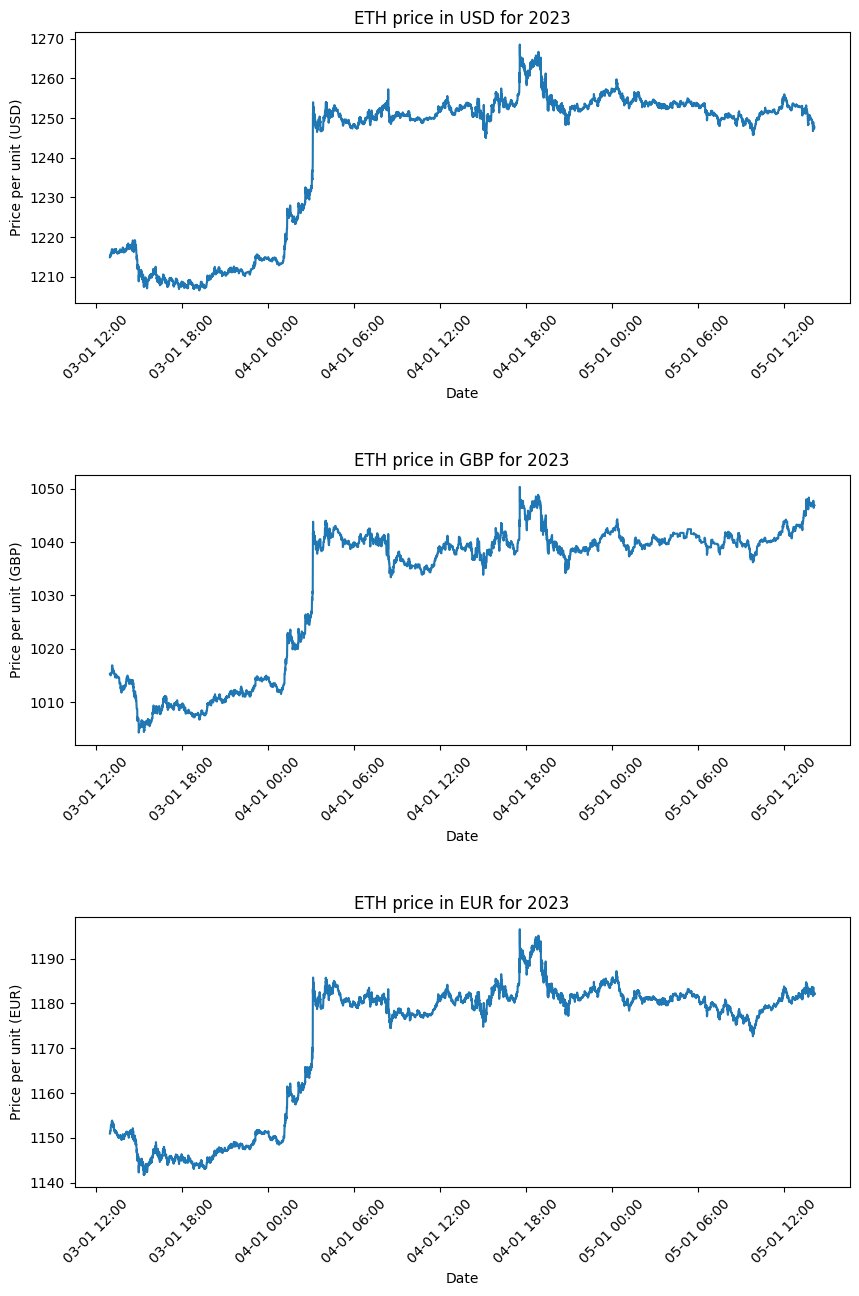

In [46]:
plot_crypto_comparison('ETH')

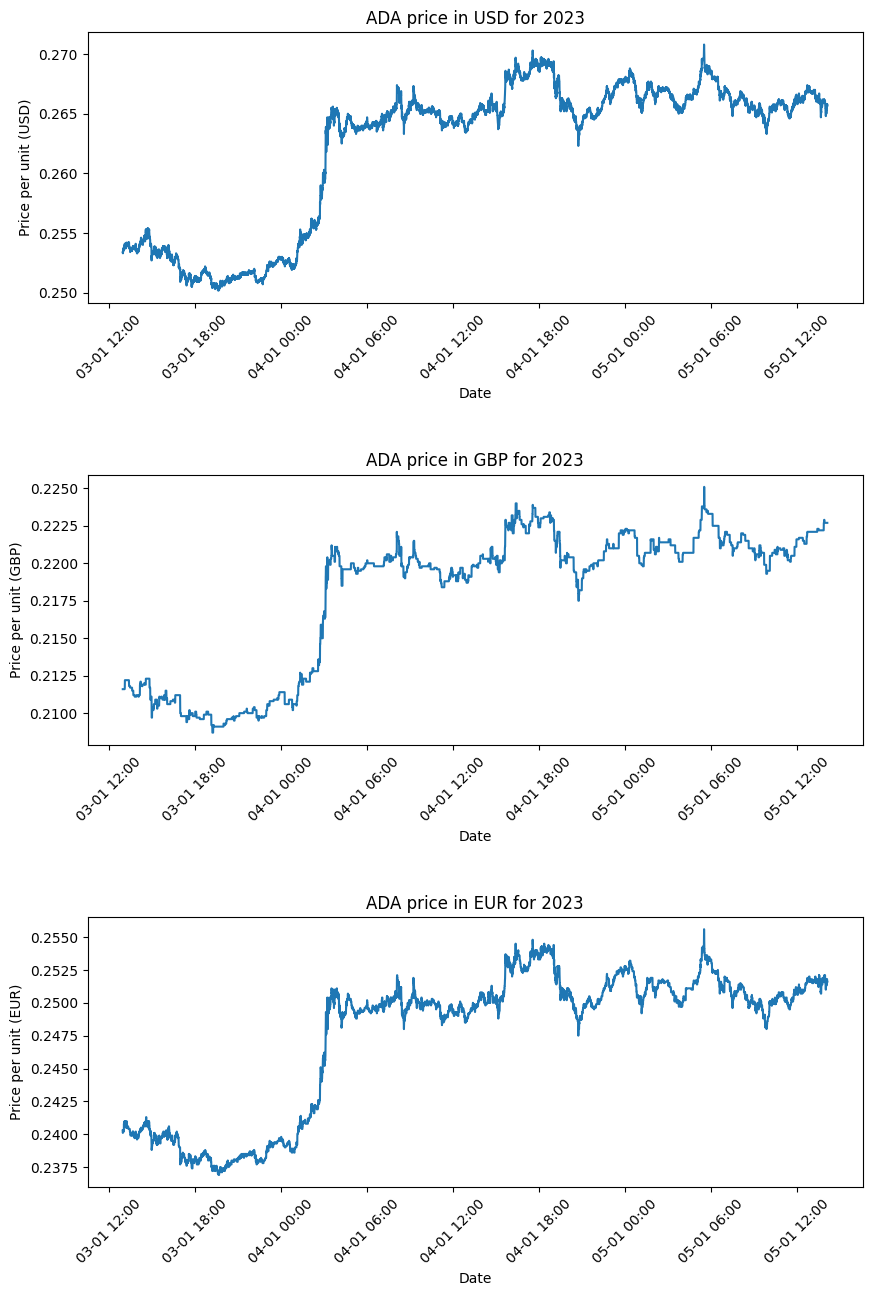

In [47]:
plot_crypto_comparison('ADA')

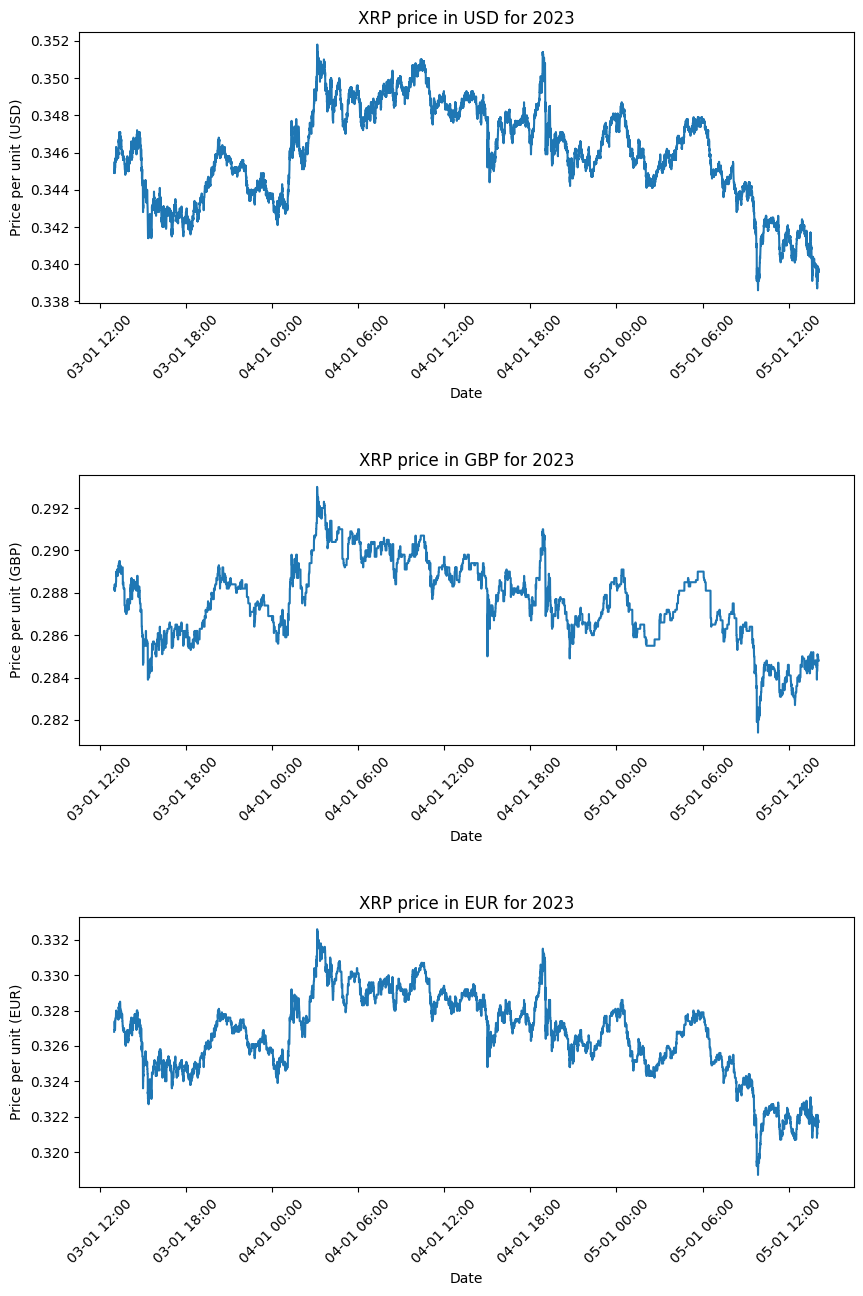

In [48]:
plot_crypto_comparison('XRP')

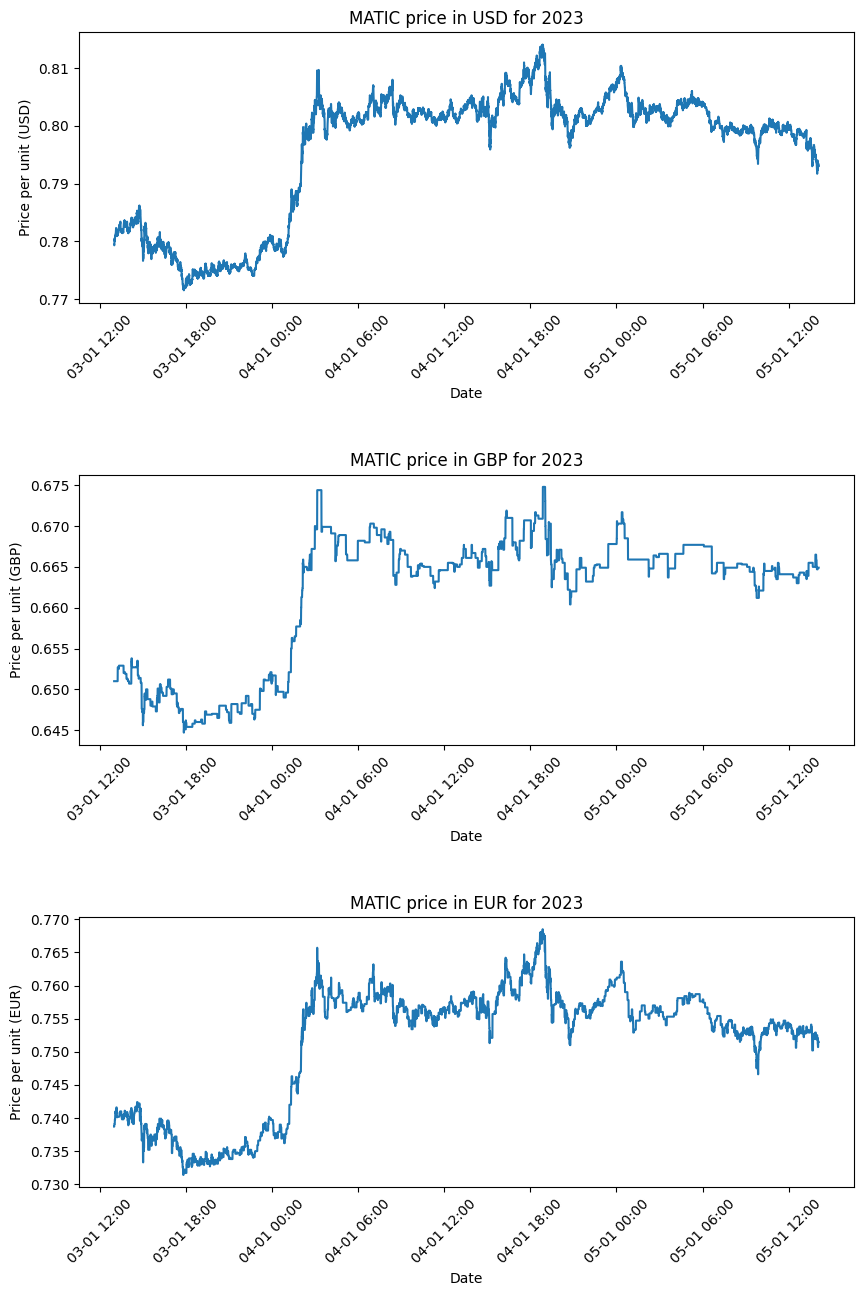

In [49]:
plot_crypto_comparison('MATIC')

# Number of Tweets

In [14]:
crypto = spark.sql("select * from twitter_data LIMIT 18")
crypto.show()

+----------+----------+-----------+-------------------+
|       end|     start|tweet_count|               time|
+----------+----------+-----------+-------------------+
|2023-01-03|2023-01-03|        108|2023-01-03-15-56-45|
|2023-01-03|2023-01-03|        103|2023-01-03-15-58-45|
|2023-01-03|2023-01-03|        108|2023-01-03-16-00-45|
|2023-01-03|2023-01-03|        107|2023-01-03-16-07-45|
|2023-01-03|2023-01-03|        124|2023-01-03-16-16-45|
|2023-01-03|2023-01-03|        112|2023-01-03-16-30-46|
|2023-01-03|2023-01-03|        114|2023-01-03-16-51-46|
|2023-01-03|2023-01-03|        121|2023-01-03-16-52-46|
|2023-01-03|2023-01-03|        109|2023-01-03-17-00-46|
|2023-01-03|2023-01-03|        103|2023-01-03-17-10-46|
|2023-01-03|2023-01-03|        106|2023-01-03-17-58-47|
|2023-01-03|2023-01-03|        100|2023-01-03-18-00-47|
|2023-01-03|2023-01-03|        101|2023-01-03-18-10-48|
|2023-01-03|2023-01-03|        102|2023-01-03-18-13-47|
|2023-01-03|2023-01-03|        106|2023-01-03-18

Text(0, 0.5, 'Number of tweets')

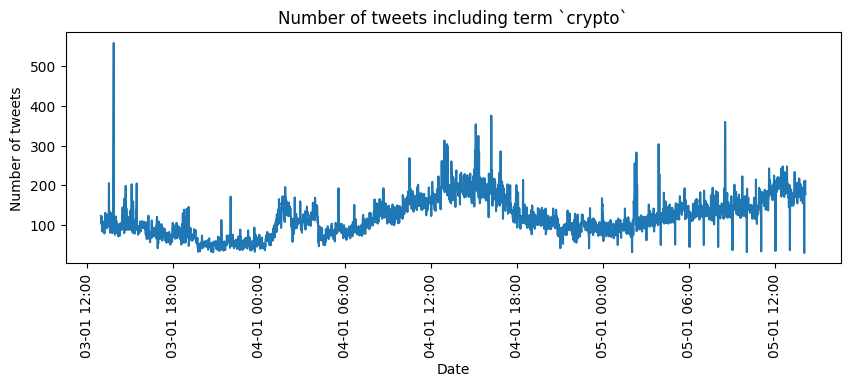

In [62]:
tweets = spark.sql("SELECT tweet_count, time FROM twitter_data WHERE NOT rlike(time, '2023-01-02-*')")
tweets_pd = tweets.toPandas()
time = tweets_pd['time'].values.tolist()
time = pd.to_datetime(time, format='%Y-%m-%d-%H-%M-%S')
DFT = pd.DataFrame()
DFT['tweet_count'] = tweets_pd['tweet_count']
DFT['time'] = time
DFT = DFT.sort_values('time').reset_index(drop = True)

date_form = DateFormatter('%d-%m %H:%M')
#date_form = DateFormatter('%Y-%m-%d')


fig = plt.figure(figsize = (10, 3))
ax1 = plt.subplot2grid((1, 1), (0, 0), rowspan=1, colspan=1)
ax1.tick_params(axis='x', rotation=90)
ax1.xaxis.set_major_formatter(date_form)

p1 = sns.lineplot(data = DFT, x = 'time', y = 'tweet_count', ax = ax1)
p1.set_title('Number of tweets including term `crypto`')
p1.set_xlabel('Date')
p1.set_ylabel('Number of tweets')

# Crypto currency dependancy on the number of tweets

Text(0, 0.5, 'Price per unit (USD)')

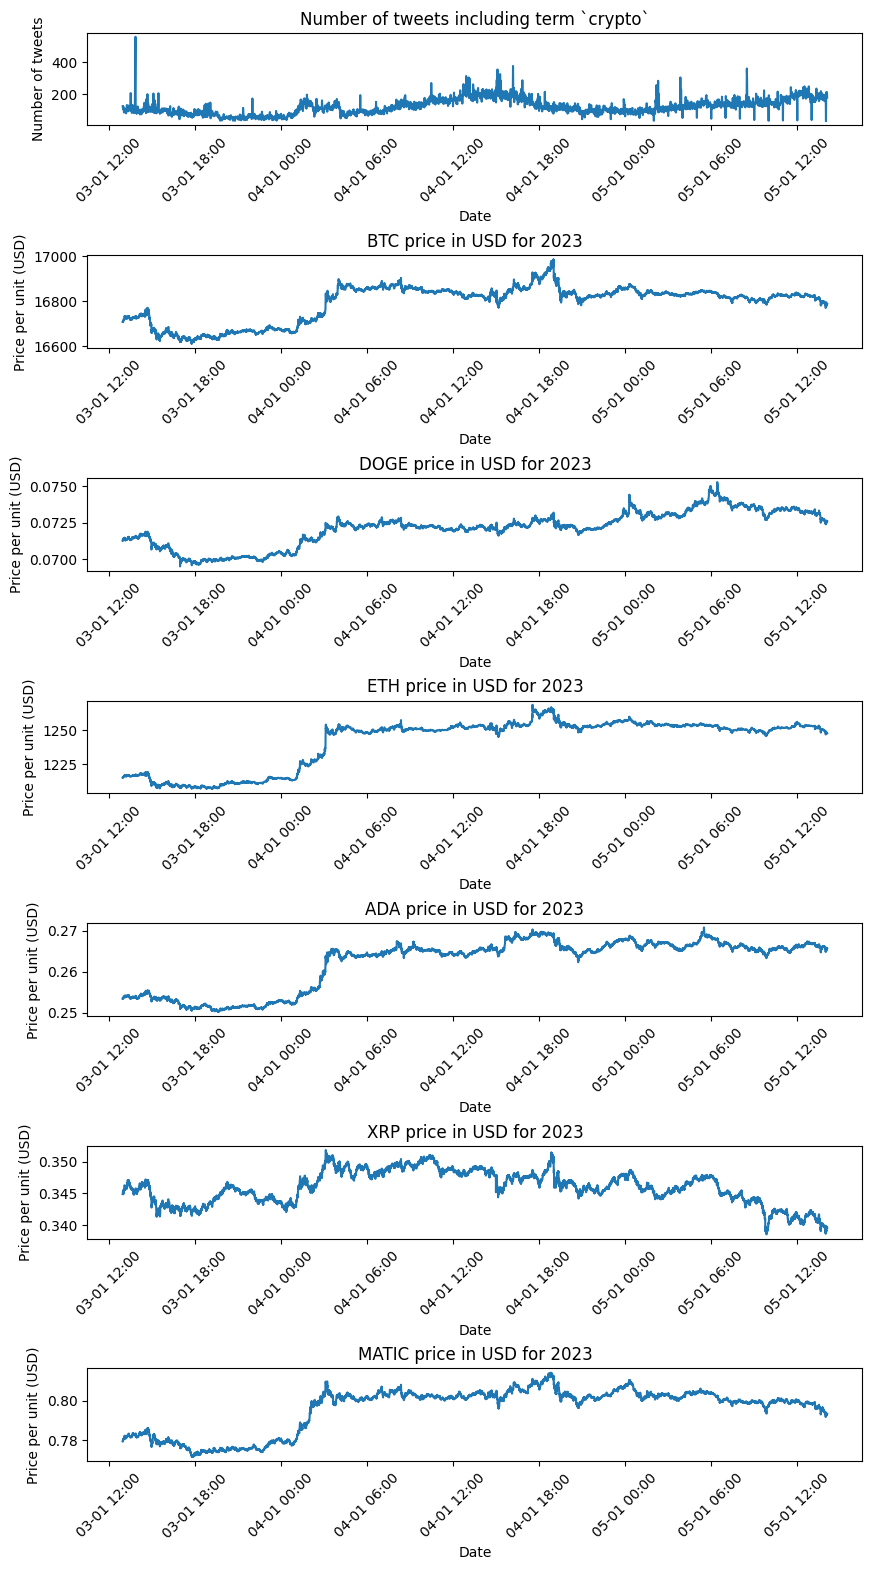

In [63]:
tweets = spark.sql("SELECT tweet_count, time FROM twitter_data WHERE NOT rlike(time, '2023-01-02-*')")
tweets_pd = tweets.toPandas()
time = tweets_pd['time'].values.tolist()
time = pd.to_datetime(time, format='%Y-%m-%d-%H-%M-%S')
DFT = pd.DataFrame()
DFT['tweet_count'] = tweets_pd['tweet_count']
DFT['time'] = time
DFT = DFT.sort_values('time').reset_index(drop = True)

crypto = spark.sql(str("SELECT * FROM crypto_data WHERE symbol == 'BTCUSDT' AND NOT rlike(time, '2023-01-02-*')"))
crypto_pd = crypto.toPandas()
time = crypto_pd['time'].values.tolist()
time = pd.to_datetime(time, format='%Y-%m-%d-%H-%M-%S')
DF1 = pd.DataFrame()
DF1['price'] = crypto_pd['price']
DF1['time'] = time
DF1 = DF1.sort_values('time').reset_index(drop = True)

crypto = spark.sql(str("SELECT * FROM crypto_data WHERE symbol == 'DOGEUSDT' AND NOT rlike(time, '2023-01-02-*')"))
crypto_pd = crypto.toPandas()
time = crypto_pd['time'].values.tolist()
time = pd.to_datetime(time, format='%Y-%m-%d-%H-%M-%S')
DF2 = pd.DataFrame()
DF2['price'] = crypto_pd['price']
DF2['time'] = time
DF2 = DF2.sort_values('time').reset_index(drop = True)

crypto = spark.sql(str("SELECT * FROM crypto_data WHERE symbol == 'ETHUSDT' AND NOT rlike(time, '2023-01-02-*')"))
crypto_pd = crypto.toPandas()
time = crypto_pd['time'].values.tolist()
time = pd.to_datetime(time, format='%Y-%m-%d-%H-%M-%S')
DF3 = pd.DataFrame()
DF3['price'] = crypto_pd['price']
DF3['time'] = time
DF3 = DF3.sort_values('time').reset_index(drop = True)

crypto = spark.sql(str("SELECT * FROM crypto_data WHERE symbol == 'ADAUSDT' AND NOT rlike(time, '2023-01-02-*')"))
crypto_pd = crypto.toPandas()
time = crypto_pd['time'].values.tolist()
time = pd.to_datetime(time, format='%Y-%m-%d-%H-%M-%S')
DF4 = pd.DataFrame()
DF4['price'] = crypto_pd['price']
DF4['time'] = time
DF4 = DF4.sort_values('time').reset_index(drop = True)

crypto = spark.sql(str("SELECT * FROM crypto_data WHERE symbol == 'XRPUSDT' AND NOT rlike(time, '2023-01-02-*')"))
crypto_pd = crypto.toPandas()
time = crypto_pd['time'].values.tolist()
time = pd.to_datetime(time, format='%Y-%m-%d-%H-%M-%S')
DF5 = pd.DataFrame()
DF5['price'] = crypto_pd['price']
DF5['time'] = time
DF5 = DF5.sort_values('time').reset_index(drop = True)

crypto = spark.sql(str("SELECT * FROM crypto_data WHERE symbol == 'MATICUSDT' AND NOT rlike(time, '2023-01-02-*')"))
crypto_pd = crypto.toPandas()
time = crypto_pd['time'].values.tolist()
time = pd.to_datetime(time, format='%Y-%m-%d-%H-%M-%S')
DF6 = pd.DataFrame()
DF6['price'] = crypto_pd['price']
DF6['time'] = time
DF6 = DF6.sort_values('time').reset_index(drop = True)

date_form = DateFormatter('%d-%m %H:%M')


fig = plt.figure(figsize = (10, 20))
axT = plt.subplot2grid((14, 1), (0, 0), rowspan=1, colspan=1)
axT.tick_params(axis='x', rotation = 45)
axT.xaxis.set_major_formatter(date_form)

ax1 = plt.subplot2grid((14, 1), (2, 0), rowspan=1, colspan=1)
ax1.tick_params(axis='x', rotation=45)
ax1.xaxis.set_major_formatter(date_form)

ax2 = plt.subplot2grid((14, 1), (4, 0), rowspan=1, colspan=1)
ax2.tick_params(axis='x', rotation=45)
ax2.xaxis.set_major_formatter(date_form)

ax3 = plt.subplot2grid((14, 1), (6, 0), rowspan=1, colspan=1)
ax3.tick_params(axis='x', rotation=45)
ax3.xaxis.set_major_formatter(date_form)

ax4 = plt.subplot2grid((14, 1), (8, 0), rowspan=1, colspan=1)
ax4.tick_params(axis='x', rotation=45)
ax4.xaxis.set_major_formatter(date_form)

ax5 = plt.subplot2grid((14, 1), (10, 0), rowspan=1, colspan=1)
ax5.tick_params(axis='x', rotation=45)
ax5.xaxis.set_major_formatter(date_form)

ax6 = plt.subplot2grid((14, 1), (12, 0), rowspan=1, colspan=1)
ax6.tick_params(axis='x', rotation=45)
ax6.xaxis.set_major_formatter(date_form)



pT = sns.lineplot(data = DFT, x = 'time', y = 'tweet_count', ax = axT)
pT.set_title('Number of tweets including term `crypto`')
pT.set_xlabel('Date')
pT.set_ylabel('Number of tweets')


p1 = sns.lineplot(data = DF1, x = 'time', y = 'price', ax = ax1)
p1.set_title('BTC price in USD for 2023')
p1.set_xlabel('Date')
p1.set_ylabel('Price per unit (USD)')

p1 = sns.lineplot(data = DF2, x = 'time', y = 'price', ax = ax2)
p1.set_title('DOGE price in USD for 2023')
p1.set_xlabel('Date')
p1.set_ylabel('Price per unit (USD)')

p1 = sns.lineplot(data = DF3, x = 'time', y = 'price', ax = ax3)
p1.set_title('ETH price in USD for 2023')
p1.set_xlabel('Date')
p1.set_ylabel('Price per unit (USD)')

p1 = sns.lineplot(data = DF4, x = 'time', y = 'price', ax = ax4)
p1.set_title('ADA price in USD for 2023')
p1.set_xlabel('Date')
p1.set_ylabel('Price per unit (USD)')

p1 = sns.lineplot(data = DF5, x = 'time', y = 'price', ax = ax5)
p1.set_title('XRP price in USD for 2023')
p1.set_xlabel('Date')
p1.set_ylabel('Price per unit (USD)')

p1 = sns.lineplot(data = DF6, x = 'time', y = 'price', ax = ax6)
p1.set_title('MATIC price in USD for 2023')
p1.set_xlabel('Date')
p1.set_ylabel('Price per unit (USD)')

# Cryptocurrencies correlation

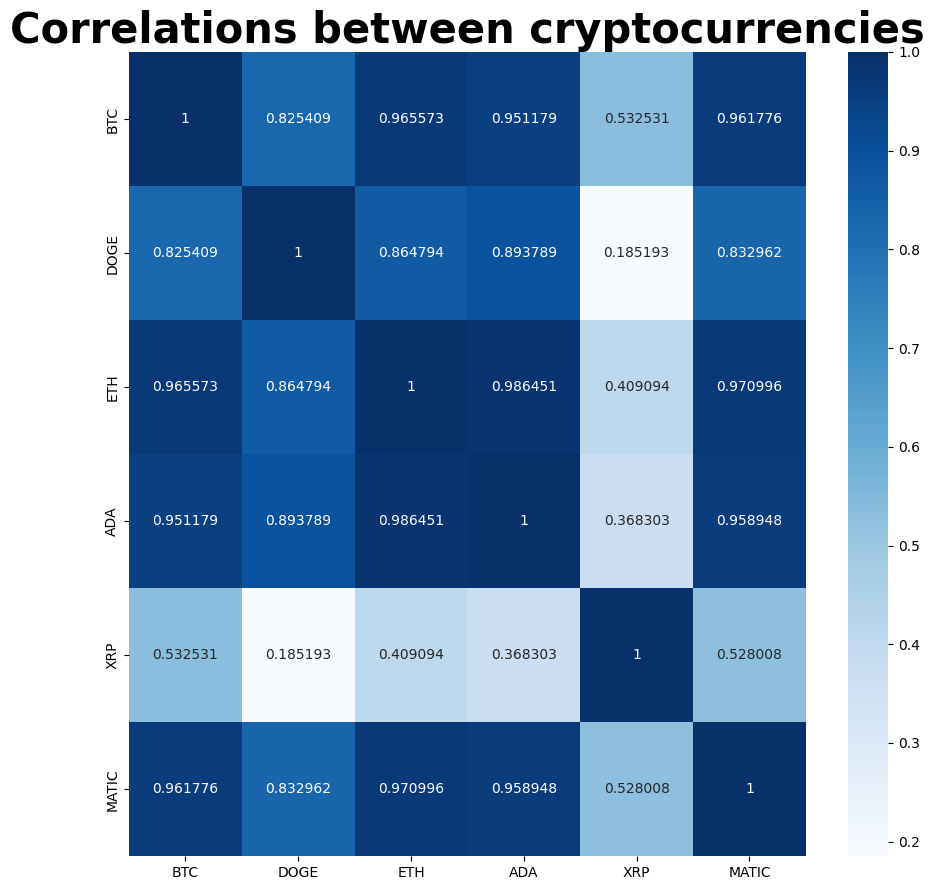

In [61]:
currencies = pd.DataFrame({'BTC': DF1['price'],'DOGE': DF2['price'],'ETH': DF3['price'],'ADA': DF4['price'],'XRP': DF5['price'],'MATIC': DF6['price'],})
currencies

fig = plt.figure(figsize = (9, 9))
ax1 = plt.subplot2grid((1, 1), (0, 0), rowspan=1, colspan=1)
p1 = sns.heatmap(currencies.corr(), square = False, annot = True, cmap = 'Blues', fmt = 'g', ax = ax1)
p1.set_title('Correlations between cryptocurrencies', fontsize = 30, fontdict = {'weight': 'bold'} )

plt.tight_layout()
plt.show()

# Cryptocurrency comparison

In [58]:
def compare_two_cryptos(crypto1, crypto2):
    crypto = spark.sql(str("SELECT * FROM crypto_data WHERE symbol == '" + str(crypto1) + "USDT' AND NOT rlike(time, '2023-01-02-*')"))
    crypto_pd = crypto.toPandas()
    time = crypto_pd['time'].values.tolist()
    time = pd.to_datetime(time, format='%Y-%m-%d-%H-%M-%S')
    DF1 = pd.DataFrame()
    DF1['price'] = crypto_pd['price']
    DF1['time'] = time
    DF1 = DF1.sort_values('time').reset_index(drop = True)

    crypto = spark.sql(str("SELECT * FROM crypto_data WHERE symbol == '" + str(crypto2) + "USDT' AND NOT rlike(time, '2023-01-02-*')"))
    crypto_pd = crypto.toPandas()
    time = crypto_pd['time'].values.tolist()
    time = pd.to_datetime(time, format='%Y-%m-%d-%H-%M-%S')
    DF2 = pd.DataFrame()
    DF2['price'] = crypto_pd['price']
    DF2['time'] = time
    DF2 = DF2.sort_values('time').reset_index(drop = True)
    
    date_form = DateFormatter('%d-%m %H:%M')

    fig = plt.figure(figsize = (10, 10))

    ax1 = plt.subplot2grid((7, 1), (0, 0), rowspan=3, colspan=1)
    ax1.tick_params(axis='x', rotation=45)
    ax1.xaxis.set_major_formatter(date_form)

    ax2 = plt.subplot2grid((7, 1), (4, 0), rowspan=3, colspan=1)
    ax2.tick_params(axis='x', rotation=45)
    ax2.xaxis.set_major_formatter(date_form)
    
    p1 = sns.lineplot(data = DF1, x = 'time', y = 'price', ax = ax1)
    p1.set_title(crypto1 + ' price in USD for 2023')
    p1.set_xlabel('Date')
    p1.set_ylabel('Price per unit (USD)')

    p1 = sns.lineplot(data = DF2, x = 'time', y = 'price', ax = ax2)
    p1.set_title(crypto2 + ' price in USD for 2023')
    p1.set_xlabel('Date')
    p1.set_ylabel('Price per unit (USD)')

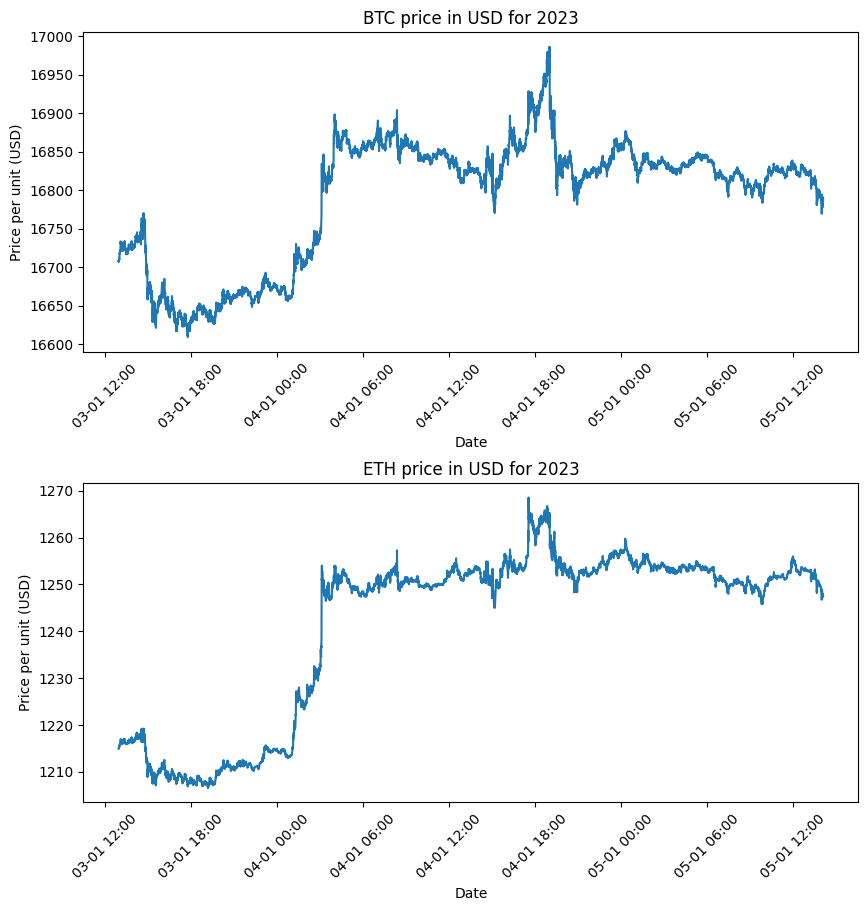

In [59]:
compare_two_cryptos('BTC', 'ETH')

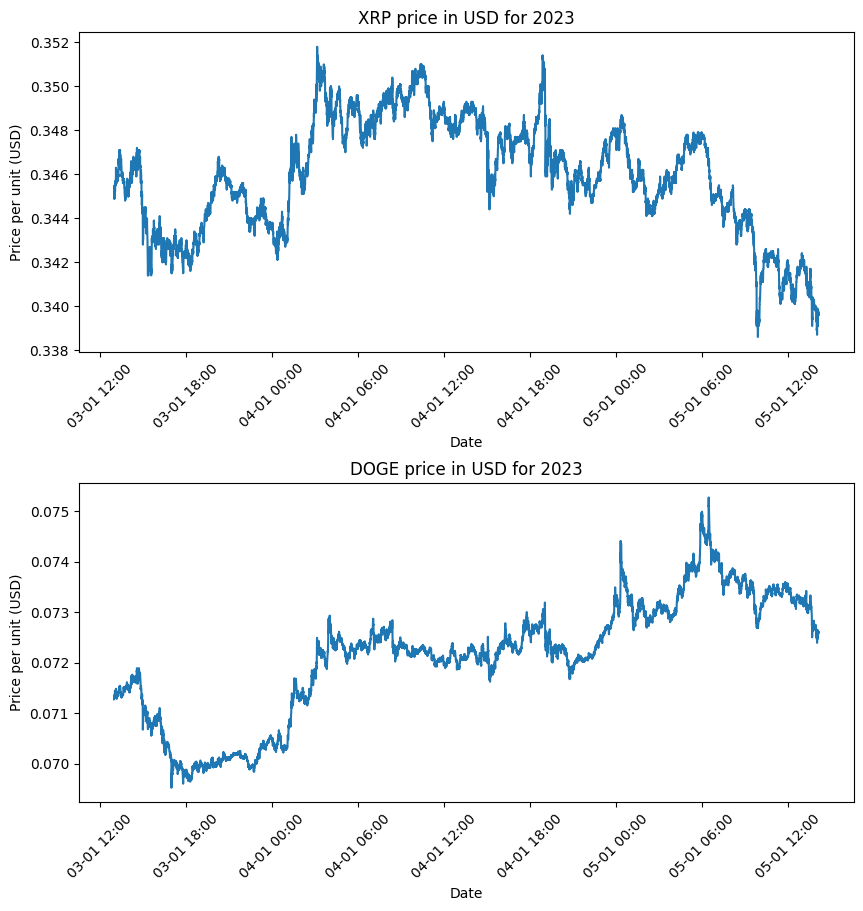

In [55]:
compare_two_cryptos('XRP', 'DOGE')

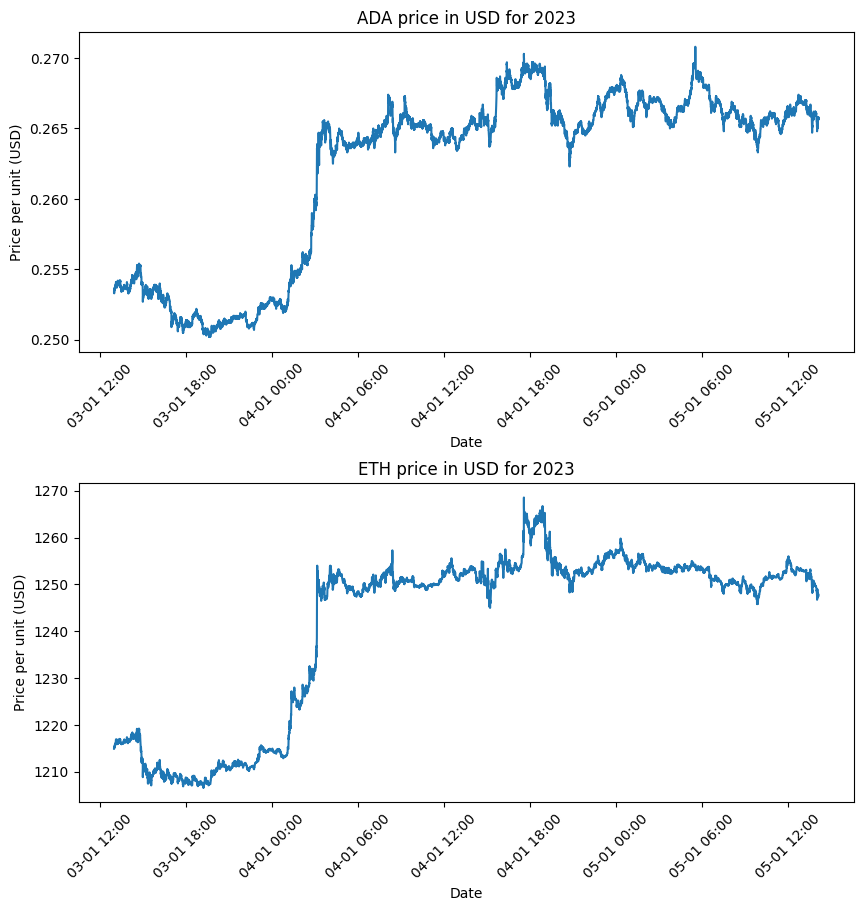

In [64]:
compare_two_cryptos('ADA', 'ETH')

# HBase

In [6]:
import happybase

In [14]:
VM_address = 'localhost'#'vl39.mini.pw.edu.pl'
connection = happybase.Connection(VM_address, port=9090)
table = connection.table('projekt')
scanner = table.scan()
for t in scanner:
    print(t)

(b'crypto_data_0', {b'price_data:price': b'16736.58984375', b'price_data:time': b'2023-01-02-10-19-11', b'symbols:symbol_1': b'BTC', b'symbols:symbol_2': b'USDT', b'symbols:trade_symbol': b'BTCUSDT'})
(b'crypto_data_1', {b'price_data:price': b'1218.75', b'price_data:time': b'2023-01-02-10-19-11', b'symbols:symbol_1': b'ETH', b'symbols:symbol_2': b'USDT', b'symbols:trade_symbol': b'ETHUSDT'})
(b'crypto_data_10', {b'price_data:price': b'1011.0800170898438', b'price_data:time': b'2023-01-02-10-19-11', b'symbols:symbol_1': b'ETH', b'symbols:symbol_2': b'GBP', b'symbols:trade_symbol': b'ETHGBP'})
(b'crypto_data_100', {b'price_data:price': b'0.05973000079393387', b'price_data:time': b'2023-01-02-10-19-53', b'symbols:symbol_1': b'DOGE', b'symbols:symbol_2': b'GBP', b'symbols:trade_symbol': b'DOGEGBP'})
(b'crypto_data_1000', {b'price_data:price': b'4.2829999923706055', b'price_data:time': b'2023-01-03-13-20-08', b'symbols:symbol_1': b'DOT', b'symbols:symbol_2': b'EUR', b'symbols:trade_symbol':

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(b'crypto_data_220597', {b'price_data:price': b'4.374000072479248', b'price_data:time': b'2023-01-04-10-09-43', b'symbols:symbol_1': b'DOT', b'symbols:symbol_2': b'EUR', b'symbols:trade_symbol': b'DOTEUR'})
(b'crypto_data_220598', {b'price_data:price': b'0.2498999983072281', b'price_data:time': b'2023-01-04-10-09-43', b'symbols:symbol_1': b'ADA', b'symbols:symbol_2': b'EUR', b'symbols:trade_symbol': b'ADAEUR'})
(b'crypto_data_220599', {b'price_data:price': b'0.06804999709129333', b'price_data:time': b'2023-01-04-10-09-43', b'symbols:symbol_1': b'DOGE', b'symbols:symbol_2': b'EUR', b'symbols:trade_symbol': b'DOGEEUR'})
(b'crypto_data_2206', {b'price_data:price': b'1208.27001953125', b'price_data:time': b'2023-01-03-19-22-32', b'symbols:symbol_1': b'ETH', b'symbols:symbol_2': b'USDT', b'symbols:trade_symbol': b'ETHUSDT'})
(b'crypto_data_22060', {b'price_data:price': b'1042.72998046875', b'price_data:time': b'2023-01-04-04-36-47', b'symbols:symbol_1': b'ETH', b'symbols:symbol_2': b'GBP', 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(b'crypto_data_7192', {b'price_data:price': b'1009.7100219726562', b'price_data:time': b'2023-01-02-09-44-07', b'symbols:symbol_1': b'ETH', b'symbols:symbol_2': b'GBP', b'symbols:trade_symbol': b'ETHGBP'})
(b'crypto_data_71920', {b'price_data:price': b'0.059620000422000885', b'price_data:time': b'2023-01-04-15-16-58', b'symbols:symbol_1': b'DOGE', b'symbols:symbol_2': b'GBP', b'symbols:trade_symbol': b'DOGEGBP'})
(b'crypto_data_71921', {b'price_data:price': b'3.8399999141693115', b'price_data:time': b'2023-01-04-15-16-58', b'symbols:symbol_1': b'DOT', b'symbols:symbol_2': b'GBP', b'symbols:trade_symbol': b'DOTGBP'})
(b'crypto_data_71922', {b'price_data:price': b'0.22020000219345093', b'price_data:time': b'2023-01-04-15-16-58', b'symbols:symbol_1': b'ADA', b'symbols:symbol_2': b'GBP', b'symbols:trade_symbol': b'ADAGBP'})
(b'crypto_data_71923', {b'price_data:price': b'0.7520999908447266', b'price_data:time': b'2023-01-04-15-16-58', b'symbols:symbol_1': b'MATIC', b'symbols:symbol_2': b'EU

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(b'crypto_data_99820', {b'price_data:price': b'1132.1800537109375', b'price_data:time': b'2023-01-02-10-43-20', b'symbols:symbol_1': b'ETH', b'symbols:symbol_2': b'EUR', b'symbols:trade_symbol': b'ETHEUR'})
(b'crypto_data_99821', {b'price_data:price': b'0.3212999999523163', b'price_data:time': b'2023-01-02-10-43-20', b'symbols:symbol_1': b'XRP', b'symbols:symbol_2': b'EUR', b'symbols:trade_symbol': b'XRPEUR'})
(b'crypto_data_99822', {b'price_data:price': b'13876.240234375', b'price_data:time': b'2023-01-02-10-43-20', b'symbols:symbol_1': b'BTC', b'symbols:symbol_2': b'GBP', b'symbols:trade_symbol': b'BTCGBP'})
(b'crypto_data_99823', {b'price_data:price': b'1010.0', b'price_data:time': b'2023-01-02-10-43-20', b'symbols:symbol_1': b'ETH', b'symbols:symbol_2': b'GBP', b'symbols:trade_symbol': b'ETHGBP'})
(b'crypto_data_99824', {b'price_data:price': b'0.2865999937057495', b'price_data:time': b'2023-01-02-10-43-20', b'symbols:symbol_1': b'XRP', b'symbols:symbol_2': b'GBP', b'symbols:trade_s

In [155]:
def create_table(crypto):
    print('Acessing the data')
    connection = happybase.Connection(VM_address, port = 9090)
    table = connection.table('projekt')
    columns = [b'price_data:price', b'price_data:time', b'symbols:symbol_1', b'symbols:symbol_2', b'symbols:trade_symbol']
    columns = [str(c, 'UTF-8') for c in columns]
    x = {}
    for c in columns:
        x[c] = []
    output_df = pd.DataFrame(x)
    i = 0
    
    for key, data in table.scan(columns = columns):
        d = {}
        for column, value in data.items():
            if str(column, 'UTF-8') == 'symbols:trade_symbol' and str(value, 'UTF-8') == crypto:
                i = len(columns) - 1
            i -= 1
            if str(column, 'UTF-8') == 'price_data:price':
                d[str(column, 'UTF-8')] = [float(value)]
            else:
                d[str(column, 'UTF-8')] = [str(value, 'UTF-8')]
        if i > 0:
            dataframe = pd.DataFrame.from_dict(d, orient='columns')
            dataframe = dataframe[columns]
            output_df = pd.concat([output_df, dataframe])
            
    return output_df

In [156]:
BTCUSDT  = create_table('BTCUSDT')['price_data:price']
ETHUSDT  = create_table('ETHUSDT')['price_data:price']
DOGEUSDT = create_table('DOGEUSDT')['price_data:price']
DOTUSDT  = create_table('DOTUSDT')['price_data:price']
XRPUSDT  = create_table('XRPUSDT')['price_data:price']
ADAUSDT  = create_table('ADAUSDT')['price_data:price']
Crypto   = ['BTCUSDT', 'ETHUSDT', 'DOGEUSDT', 'DOTUSDT', 'XRPUSDT', 'ADAUSDT']
Min      = [BTCUSDT.min(), ETHUSDT.min(), DOGEUSDT.min(), DOTUSDT.min(), XRPUSDT.min(), ADAUSDT.min()]
Min_rel  = [BTCUSDT.min() / BTCUSDT.mean(), DOGEUSDT.min() / DOGEUSDT.mean(), DOGEUSDT.min() / DOGEUSDT.mean(), DOTUSDT.min() / DOTUSDT.mean(), XRPUSDT.min() / XRPUSDT.mean(), ADAUSDT.min() / ADAUSDT.mean()]
Mean     = [BTCUSDT.mean(), ETHUSDT.mean(), DOGEUSDT.mean(), DOTUSDT.mean(), XRPUSDT.mean(), ADAUSDT.mean()]
Max_rel  = [BTCUSDT.max() / BTCUSDT.mean(), DOGEUSDT.max() / DOGEUSDT.mean(), DOGEUSDT.max() / DOGEUSDT.mean(), DOTUSDT.max() / DOTUSDT.mean(), XRPUSDT.max() / XRPUSDT.mean(), ADAUSDT.max() / ADAUSDT.mean()]
Max      = [BTCUSDT.max(), ETHUSDT.max(), DOGEUSDT.max(), DOTUSDT.max(), XRPUSDT.max(), ADAUSDT.max()]

Diff_analysis = pd.DataFrame({'Crypto': Crypto, 'Min': Min, 'Min_rel': Min_rel, 'Mean': Mean, 'Max': Max, 'Max_rel': Max_rel,})
Diff_analysis

Acessing the data
Acessing the data
Acessing the data
Acessing the data
Acessing the data
Acessing the data


Crypto           Min   Min_rel          Mean           Max   Max_rel
0   BTCUSDT  16609.220703  0.989404  16787.099751  16986.230469  1.011862
1   ETHUSDT   1206.599976  0.964140   1239.648720   1268.550049  1.043884
2  DOGEUSDT      0.069520  0.964140      0.072106      0.075270  1.043884
3   DOTUSDT      4.481000  0.976397      4.589323      4.685000  1.020848
4   XRPUSDT      0.338600  0.978972      0.345873      0.351800  1.017136
5   ADAUSDT      0.250200  0.956561      0.261562      0.270800  1.035319